# Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Text analysis
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# IMPORTING THE 1st DATASET

In [2]:
df1 = pd.read_csv("QVI_transaction_data.csv")
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#  High Level Summaries For Transaction Data

In [3]:
print("The dimension for transaction data is: \n",df1.shape,"\n")
print("The column names for transaction data are: \n",df1.columns)

The dimension for transaction data is: 
 (264836, 8) 

The column names for transaction data are: 
 Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')


In [4]:
print("The variable types for transaction data are:")
df1.info()

The variable types for transaction data are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
import datetime
def int_date(csvdata):
    csvdate = datetime.datetime(1900, 1, 1)
    if(csvdata<60):
        delta_in_days = datetime.timedelta(days = (csvdata - 1))
    else:
        delta_in_days = datetime.timedelta(days = (csvdata - 2))
    converted_date = csvdate + delta_in_days
    return converted_date

In [6]:
df1['DATE'] =df1['DATE'].apply(int_date)
df1['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [7]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
print("Checking the null values for transaction data are:")
df1.isnull().sum()

Checking the null values for transaction data are:


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [9]:
print("Checking for duplicate values")
df1[df1.duplicated(['TXN_ID'])].head()

Checking for duplicate values


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,2018-10-18,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,2018-09-08,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,2018-08-03,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [10]:
# Select the first duplicated TXN_ID
df1.loc[df1['TXN_ID'] == 48887, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.60


In [11]:
print("After emoving the duplicate values: ")
#removing the duplicate values
df1.drop(df1[df1['TXN_ID'].duplicated()].index, axis=0, inplace=True)
print("The dimension for transaction data is: \n",df1.shape,"\n")

After emoving the duplicate values: 
The dimension for transaction data is: 
 (263127, 8) 



In [12]:
df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,263127.000000,2.631270e+05,2.631270e+05,263127.000000,263127.000000,263127.000000
mean,135.080672,1.355521e+05,1.351594e+05,56.579268,1.907007,7.304008
std,76.799192,8.061834e+04,7.814901e+04,32.824478,0.645408,3.087069
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.001800e+04,6.758450e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303580e+05,1.351430e+05,56.000000,2.000000,7.400000
75%,203.000000,2.031010e+05,2.027255e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [13]:
df1['DATE'].describe()

count                  263127
unique                    364
top       2018-12-24 00:00:00
freq                      934
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [14]:
# We need to analyse the product name. 
df1['PROD_NAME'].head(10)

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
5    Old El Paso Salsa   Dip Tomato Mild 300g
6    Smiths Crinkle Chips Salt & Vinegar 330g
7       Grain Waves         Sweet Chilli 210g
8     Doritos Corn Chip Mexican Jalapeno 150g
9       Grain Waves Sour    Cream&Chives 210G
Name: PROD_NAME, dtype: object

In [15]:
# create a new column called packet size
df1['PACK_SIZE'] = df1['PROD_NAME'].str.extract("(\d+)")
df1['PACK_SIZE'] = pd.to_numeric(df1['PACK_SIZE'])
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [16]:
# remove he special characters from the productname and also the weight
def clean_prdname(text):
    text =  re.sub('[&/]', ' ', text) 
    text =  re.sub('\d\w*', ' ', text) 
    return text

df1['PROD_NAME'] = df1['PROD_NAME'].apply(clean_prdname)
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150


In [17]:
#Separating the words
cleanname = df1['PROD_NAME']
string = "".join(cleanname)
productname = word_tokenize(string)
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150


In [18]:
#counting
fdist(productname)

FreqDist({'Chips': 49480, 'Kettle': 40473, 'Smiths': 28395, 'Cheese': 27701, 'Pringles': 24580, 'Salt': 24554, 'Doritos': 24509, 'Crinkle': 23806, 'Corn': 21927, 'Original': 21422, ...})

In [19]:
df1['PROD_NAME'] = df1['PROD_NAME'].apply(lambda x: x.lower())
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,smiths chip thinly s cream onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny jlpno chili,3,13.8,150


In [20]:
df1 = df1[~df1['PROD_NAME'].str.contains("salsa")]
df1['PROD_NAME'] = df1['PROD_NAME'].apply(lambda x: x.title())

In [21]:
print("checking the unique values from quantity",df1['PROD_QTY'].nunique())

df1['PROD_QTY'].value_counts()

checking the unique values from quantity 6


2      218558
1       25394
5         415
3         406
4         368
200         2
Name: PROD_QTY, dtype: int64

In [22]:
df1.loc[df1['PROD_QTY'] == 200,:]

#Both these transactions have been made by the same person at the same store. Let's see all the transactions this person has made by tracking his loyalty card number.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [23]:
df1.loc[df1['LYLTY_CARD_NBR'] == 226000,:]
#this customer has made two transactions over the entire year so unlikely to be a retail customer. He/she is most likely purchasing for commercial purposes so it is safe for us to drop these this customer from both 'transactionData' and 'customerData' dataset.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [24]:
df1.drop(df1.index[df1['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [25]:
df1.loc[df1['LYLTY_CARD_NBR'] == 226000,:]  #dropped successfully

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE


# OUTLIERS

In [26]:
# creating a dataframe with only numberical data type
df1_num = df1.select_dtypes(['float','int'])
df1_num.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
0,1,1000,1,5,2,6.0,175
1,1,1307,348,66,3,6.3,175
2,1,1343,383,61,2,2.9,170
3,2,2373,974,69,5,15.0,175
4,2,2426,1038,108,3,13.8,150


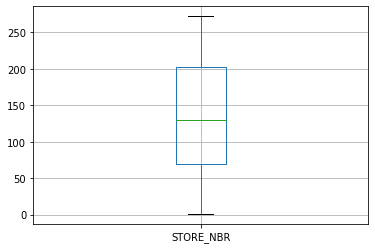

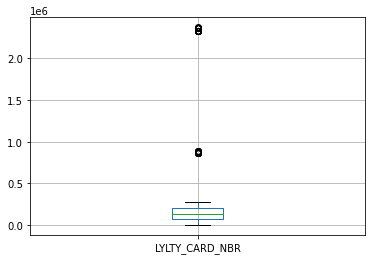

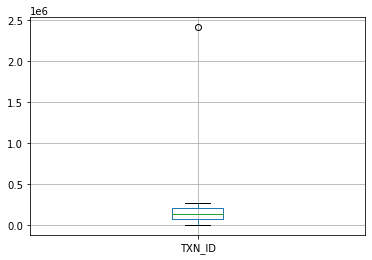

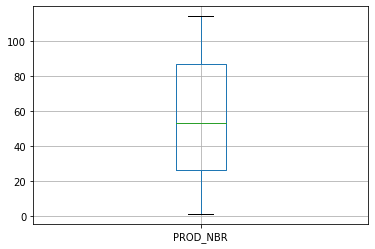

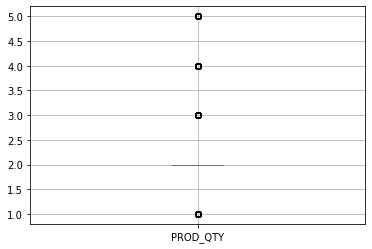

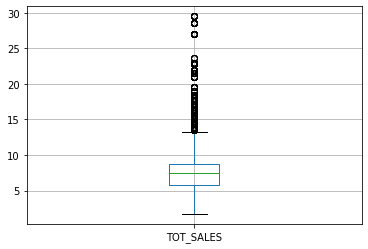

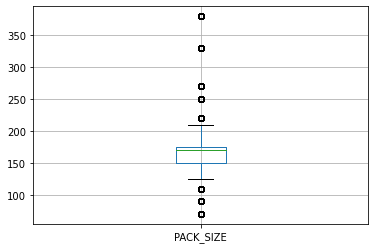

In [27]:
for column in df1_num:
    plt.figure()
    df1_num.boxplot([column])

<AxesSubplot:ylabel='Density'>

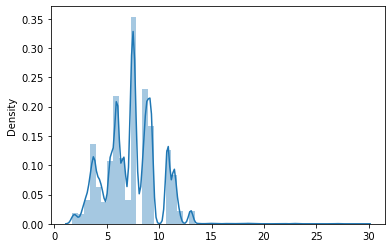

In [28]:
sns.distplot(x = df1_num['TOT_SALES'],kde = True)

In [29]:
#removing the outlier from tot_sales
a = df1_num[df1_num['TOT_SALES']<8.00]
a.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
0,1,1000,1,5,2,6.0,175
1,1,1307,348,66,3,6.3,175
2,1,1343,383,61,2,2.9,170
6,4,4149,3333,16,1,5.7,330
7,4,4196,3539,24,1,3.6,210


<AxesSubplot:xlabel='TOT_SALES', ylabel='Density'>

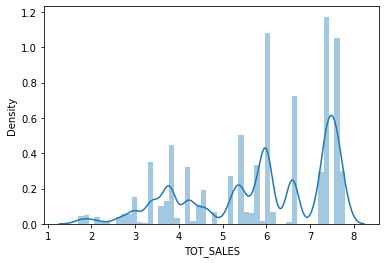

In [30]:
sns.distplot(a.TOT_SALES,kde = True)

<AxesSubplot:xlabel='TOT_SALES'>

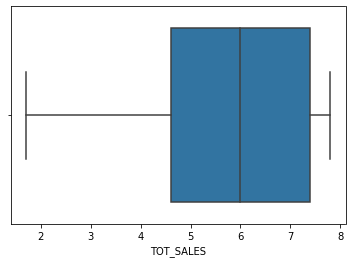

In [31]:
sns.boxplot(a['TOT_SALES'])

# IMPORTING THE 2nd DATASET

In [32]:
df2 = pd.read_csv("QVI_purchase_behaviour.csv")
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# High Level Summaries For Purchase Behaviour Data

In [33]:
print("The dimension for purchase behaviour data is: \n",df2.shape,"\n")
print("The column names for purchase behaviour data are: \n",df2.columns)

The dimension for purchase behaviour data is: 
 (72637, 3) 

The column names for purchase behaviour data are: 
 Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')


In [34]:
print("The variable types for transaction data are:")
df2.info()

The variable types for transaction data are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [35]:
print("Checking for null/missing values:")
df2.isnull().sum()

Checking for null/missing values:


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [36]:
df2.drop(df2.index[df2['LYLTY_CARD_NBR'] == 226000], inplace = True)